# **BA 870 – Assignment 2**

**Shangkun(Sherry) Zuo**  
Cohort B  
March 30, 2020

##Upload data to Pandas Dataframes

In [3]:
from google.colab import files
uploaded = files.upload()

Saving assign2.csv to assign2.csv


In [1097]:
import pandas as pd
import numpy as np
df = pd.read_csv('assign2.csv')
pd.DataFrame.from_records(df)
df.head()

,Global Company Key,Data Date,Data Year - Fiscal,Ticker Symbol,Company Name,Current Assets - Total,Accounts Payable - Trade,Assets - Total,Cash,Cost of Goods Sold,Common Shares Outstanding,Long-Term Debt - Total,Depreciation and Amortization,Dividends - Total,Inventories - Total,Current Liabilities - Total,Liabilities - Total,Net Income (Loss),"Property, Plant and Equipment - Total (Net)",Retained Earnings,Receivables - Total,Sales/Turnover (Net),Stockholders Equity - Parent,Interest and Related Expense - Total,"Selling, General and Administrative Expense",Price Close - Annual - Fiscal,Standard Industry Classification Code
0,1045,20181231,2018,AAL,AMERICAN AIRLINES GROUP INC,8637.000,1773.000,60580.000,275.000,31365.000,460.611,29081.000,2157.000,188.000,1522.000,18096.000,60749.000,1412.000,43249.000,-5138.000,1706.000,44541.000,-169.000,1056.000,7570.000,32.110,4512
1,1050,20181231,2018,CECE,CECO ENVIRONMENTAL CORP,160.865,51.984,392.582,43.676,222.543,34.816,82.313,13.272,0.000,50.511,103.886,214.022,-7.121,22.200,-72.842,53.225,337.339,178.560,7.140,87.462,6.750,3564
2,1166,20181231,2018,ASMIY,ASM INTERNATIONAL NV,779.245,92.325,2115.739,327.335,492.188,49.319,0.000,61.695,49.968,196.723,222.398,236.331,179.901,221.405,2194.090,240.479,936.619,1879.408,2.823,240.259,41.382,3559
3,1210,20190331,2018,AIRT,AIR T INC,71.348,12.553,115.142,12.524,195.685,2.023,32.918,7.686,0.000,29.968,52.794,86.308,1.340,29.982,20.986,24.262,249.834,24.358,3.340,38.376,30.190,4513
4,1230,20181231,2018,ALK,ALASKA AIR GROUP INC,1787.000,132.000,10912.000,105.000,6193.000,123.194,1617.000,398.000,158.000,60.000,2942.000,7161.000,437.000,6781.000,4086.000,366.000,8264.000,3751.000,91.000,898.000,60.850,4512


## Data Cleaning

Remove unnecessary variables and rename

In [1098]:
# Remove unnecessary data columns for 6 variable Cluster Analysis
cols_remove = [0,1,2,3,4,6,8,9,11,12,16,19,20,23,24]
df.drop(df.columns[cols_remove],axis=1, inplace=True)
#5, 7, 10, 13, 14, 15, 17, 18, 21, 22, 25, 26
#"TCA", "TA", "Shares", "Dividends", "Inventory", "TCL", "NI", "PP&E", "Sales", "Equity", "Price_of_stock", "SIC"
# Rename variables
renamed_columns = ["TCA", "TA", "Shares", "Dividends", "Inventory", "TCL", "NI", "PP&E", "Sales", "Equity", "Price_of_stock", "SIC"]
df.columns = renamed_columns
df.head()

,TCA,TA,Shares,Dividends,Inventory,TCL,NI,PP&E,Sales,Equity,Price_of_stock,SIC
0,8637.000,60580.000,460.611,188.000,1522.000,18096.000,1412.000,43249.000,44541.000,-169.000,32.110,4512
1,160.865,392.582,34.816,0.000,50.511,103.886,-7.121,22.200,337.339,178.560,6.750,3564
2,779.245,2115.739,49.319,49.968,196.723,222.398,179.901,221.405,936.619,1879.408,41.382,3559
3,71.348,115.142,2.023,0.000,29.968,52.794,1.340,29.982,249.834,24.358,30.190,4513
4,1787.000,10912.000,123.194,158.000,60.000,2942.000,437.000,6781.000,8264.000,3751.000,60.850,4512


In [1099]:
#check any NA in each variable
df.isna().any()

TCA                True
TA                False
Shares             True
Dividends          True
Inventory          True
TCL                True
NI                False
PP&E               True
Sales             False
Equity            False
Price_of_stock     True
SIC               False
dtype: bool

In [1100]:
#counting missing values
df.isna().sum()

TCA                2
TA                 0
Shares            11
Dividends          6
Inventory          5
TCL                2
NI                 0
PP&E               1
Sales              0
Equity             0
Price_of_stock    34
SIC                0
dtype: int64

Replacing missing values

In [0]:
#we don't want to remove missing values since the entire dataset is not large
#we also don't want to replace missing values with 0 since if replace with 0, the denominator could not be zero
#df.dropna(inplace=True)
df.fillna(df.median(), inplace=True)

##Calculate Financial Ratios
 

Ratios Formula
>$Current Ratio = \frac {Total Current Assets}{Total Current Liabilities} $  
>$Quick Ratio = \frac {Current Assets-Inventories}{Current Liabilities} $

>$ROA = \frac {Net Income}{Total Assets} $   


>$Fixed Assets Turnover = \frac {Annual Sales}{Net Fixed Assets} $  
>$Total Assets Turnover = \frac {Annual Sales}{Total Assets} $   


>$Market/Book Ratio = \frac {Market Price/Share}{Book Value/Share} = \frac {Market Price \times Share}{Total Assets-Total Liabilities}$     
>$P-E Ratio = \frac {Market Price/Share}{Earnings/Share}$   
>$Dividend Yield = \frac {Dividend per share}{Market price per share}$ 

Sub-Formula:   
>$Earnings Per Share = \frac {Net Income}{Outstanding Shares}$    
>$Book Value = \frac {Equity}{Outstanding Shares}$ 

In [0]:
# Calculate some financial ratios 
df['Current_Ratio'] = (df.TCA/df.TCL)
df['Quick_Ratio'] = (df.TCA-df.Inventory)/(df.TCL)
df['ROA'] = (df.NI)/ (df.TA)
df['Fixed_Assets_Turnover'] = (df.Sales)/ (df['PP&E'])
df['Total_Assets_Turnover'] = (df.Sales)/ (df.TA)

In [0]:
# Calculate 3 market value ratios
df['Market/Book_Ratio'] = df.Price_of_stock/ (df.Equity/df.Shares)
df['P/E_Ratio'] = df.Price_of_stock / (df.NI/df.Shares)
df['Dividend_Yield'] = (df.Dividends/df.Shares) / df.Price_of_stock

In [1104]:
df.head()

,TCA,TA,Shares,Dividends,Inventory,TCL,NI,PP&E,Sales,Equity,Price_of_stock,SIC,Current_Ratio,Quick_Ratio,ROA,Fixed_Assets_Turnover,Total_Assets_Turnover,Market/Book_Ratio,P/E_Ratio,Dividend_Yield
0,8637.000,60580.000,460.611,188.000,1522.000,18096.000,1412.000,43249.000,44541.000,-169.000,32.110,4512,0.477288,0.393181,0.023308,1.029874,0.735243,-87.516090,10.474659,0.012711
1,160.865,392.582,34.816,0.000,50.511,103.886,-7.121,22.200,337.339,178.560,6.750,3564,1.548476,1.062261,-0.018139,15.195450,0.859283,1.316129,-33.002106,0.000000
2,779.245,2115.739,49.319,49.968,196.723,222.398,179.901,221.405,936.619,1879.408,41.382,3559,3.503831,2.619277,0.085030,4.230343,0.442691,1.085937,11.344678,0.024483
3,71.348,115.142,2.023,0.000,29.968,52.794,1.340,29.982,249.834,24.358,30.190,4513,1.351441,0.783801,0.011638,8.332800,2.169790,2.507364,45.577888,0.000000
4,1787.000,10912.000,123.194,158.000,60.000,2942.000,437.000,6781.000,8264.000,3751.000,60.850,4512,0.607410,0.587016,0.040048,1.218699,0.757331,1.998495,17.154130,0.021077


In [1105]:
# Change 4-digit SIC code to 2-digit SIC code
df["SIC"] = (df["SIC"]/100).astype(int)

# Delete unnecessary variables after using
cols = [0,1,2,3,4,5,6,7,8,9,10]
df.drop(df.columns[cols],axis=1, inplace=True)
df.head()

,SIC,Current_Ratio,Quick_Ratio,ROA,Fixed_Assets_Turnover,Total_Assets_Turnover,Market/Book_Ratio,P/E_Ratio,Dividend_Yield
0,45,0.477288,0.393181,0.023308,1.029874,0.735243,-87.516090,10.474659,0.012711
1,35,1.548476,1.062261,-0.018139,15.195450,0.859283,1.316129,-33.002106,0.000000
2,35,3.503831,2.619277,0.085030,4.230343,0.442691,1.085937,11.344678,0.024483
3,45,1.351441,0.783801,0.011638,8.332800,2.169790,2.507364,45.577888,0.000000
4,45,0.607410,0.587016,0.040048,1.218699,0.757331,1.998495,17.154130,0.021077


In [1106]:
#check NA again after caculating ratios
df.isna().any()

SIC                      False
Current_Ratio            False
Quick_Ratio              False
ROA                      False
Fixed_Assets_Turnover    False
Total_Assets_Turnover    False
Market/Book_Ratio        False
P/E_Ratio                False
Dividend_Yield           False
dtype: bool

The data should include **6 industries**: SIC codes 20, 35, 45, 48, 58 and 80

##Check Outliers

In [1107]:
df.describe()

,SIC,Current_Ratio,Quick_Ratio,ROA,Fixed_Assets_Turnover,Total_Assets_Turnover,Market/Book_Ratio,P/E_Ratio,Dividend_Yield
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,43.519199,1.978015,1.470412,-0.334778,inf,0.992993,-1.194801,8.983886,124.361671
std,17.352124,1.957745,2.293320,5.781197,NaN,0.967175,129.566335,166.416871,3043.097199
min,20.000000,0.007059,-26.506141,-136.360000,0.001350,0.000455,-2209.878000,-2637.061218,-0.002895
25%,35.000000,0.894491,0.698429,-0.026655,1.861286,0.495746,0.814521,-2.257114,0.000000
50%,45.000000,1.453641,1.062261,0.028064,4.015421,0.724359,1.804360,12.226253,0.000098
75%,48.000000,2.394736,1.765230,0.076781,8.714748,1.189525,3.567195,21.567769,0.024316
max,80.000000,19.662736,19.662736,1.196397,inf,12.504188,1034.238806,1773.873273,74478.234943


Data Outside the boundary $[Q1-1.5IQR, Q3+1.5IQR]$ are **outliers**

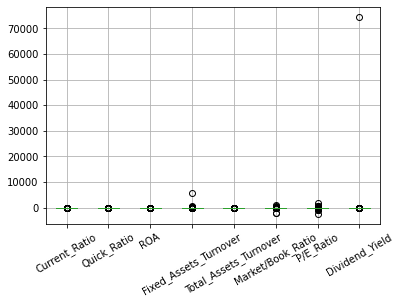

In [1108]:
boxplot = df.boxplot(column=['Current_Ratio', 'Quick_Ratio', 'ROA', 'Fixed_Assets_Turnover', 'Total_Assets_Turnover', 'Market/Book_Ratio', 'P/E_Ratio', 'Dividend_Yield'], rot=30)

Note that there appear to be big outliers (common for financial ratios), the infinite number does not affect our results after removing outliers    
Evidence: Large difference in mean and median of variables.  The maximum and minimum are really far away from the IQR   
Also, the Boxplot above shows upper outliers affect the range a lot.

##Transform Variables

Remove the effects of outliers, a much better fit  
Floor and ceiling applied to outliers for a variable based on percentiles.  

In [1109]:
from scipy.stats.mstats import winsorize
#Convert variables
for col in df.columns:
  df[col] = winsorize(df[col], limits=[0.05,0.06], inplace=True)
  #stats.winsorize(limits = [lower,upper])
     
# Convert SIC Code to a Group code. Mapping used: (SIC code 20 = Group 0), (SIC code 35 = Group 1),
# (SIC code 45 = Group 2), (SIC code 48 = Group 3), (SIC code 58 = Group 4), (SIC code 35 = Group 5)
di = {20:0, 35:1, 45:2, 48:3, 58:4, 80:5}
df['GroupSIC']=df['SIC'].map(di)

df.head()

,SIC,Current_Ratio,Quick_Ratio,ROA,Fixed_Assets_Turnover,Total_Assets_Turnover,Market/Book_Ratio,P/E_Ratio,Dividend_Yield,GroupSIC
0,45,0.477288,0.393181,0.023308,1.029874,0.735243,-7.426815,10.474659,0.012711,2
1,35,1.548476,1.062261,-0.018139,15.195450,0.859283,1.316129,-33.002106,0.000000,1
2,35,3.503831,2.619277,0.085030,4.230343,0.442691,1.085937,11.344678,0.024483,1
3,45,1.351441,0.783801,0.011638,8.332800,2.169790,2.507364,45.577888,0.000000,2
4,45,0.607410,0.587016,0.040048,1.218699,0.757331,1.998495,17.154130,0.021077,2


In [1110]:
df.describe()

,SIC,Current_Ratio,Quick_Ratio,ROA,Fixed_Assets_Turnover,Total_Assets_Turnover,Market/Book_Ratio,P/E_Ratio,Dividend_Yield,GroupSIC
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,43.519199,1.822282,1.413804,-0.013801,7.670809,0.909631,2.081136,10.212357,0.015012,2.118531
std,17.352124,1.306142,1.047182,0.171866,9.443529,0.569266,3.556131,24.989783,0.020957,1.640104
min,20.000000,0.242141,0.192830,-0.575411,0.643596,0.257303,-7.426815,-50.465391,0.000000,0.000000
25%,35.000000,0.894491,0.698429,-0.026655,1.861286,0.495746,0.814521,-2.257114,0.000000,1.000000
50%,45.000000,1.453641,1.062261,0.028064,4.015421,0.724359,1.804360,12.226253,0.000098,2.000000
75%,48.000000,2.394736,1.765230,0.076781,8.714748,1.189525,3.567195,21.567769,0.024316,3.000000
max,80.000000,5.016249,4.113005,0.168198,36.444959,2.327116,9.456508,61.516092,0.068285,5.000000


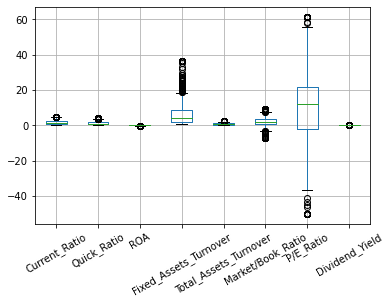

In [1111]:
boxplot2 = df.boxplot(column=['Current_Ratio', 'Quick_Ratio', 'ROA', 'Fixed_Assets_Turnover', 'Total_Assets_Turnover', 'Market/Book_Ratio', 'P/E_Ratio', 'Dividend_Yield'], rot=30)

We can see the graph above, those ranges are smaller, and the outliers are less. The table above shows that those differences between mean and median decrease, the maximum and minimum decrease.

## Visualization

#### Scatter Plots for each pairs


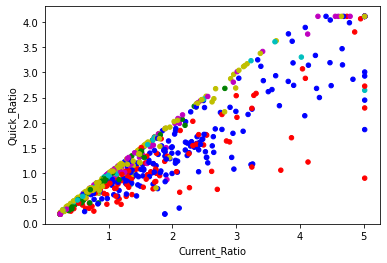

In [1112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors = np.where(df["GroupSIC"]==0,'r','-')
colors[df["GroupSIC"]==1] = 'b'
colors[df["GroupSIC"]==2] = 'c'
colors[df["GroupSIC"]==3] = 'y'
colors[df["GroupSIC"]==4] = 'g'
colors[df["GroupSIC"]==5] = 'm'

df.plot.scatter(x="Current_Ratio",y="Quick_Ratio",c=colors)
plt.show()

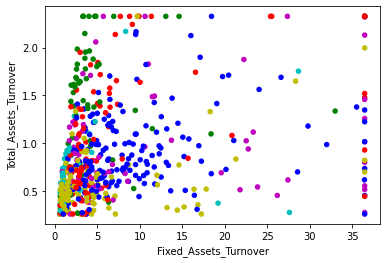

In [1113]:
df.plot.scatter(x="Fixed_Assets_Turnover",y="Total_Assets_Turnover",c=colors)
plt.show()

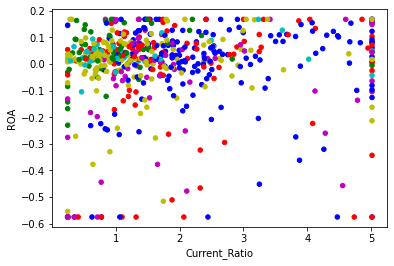

In [1114]:
df.plot.scatter(x="Current_Ratio",y="ROA",c=colors)
plt.show()

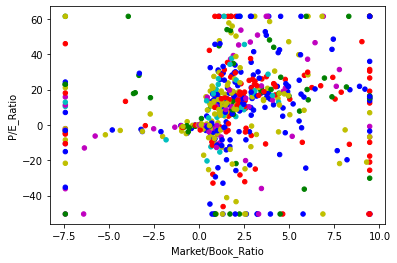

In [1115]:
df.plot.scatter(x="Market/Book_Ratio",y="P/E_Ratio",c=colors)
plt.show()

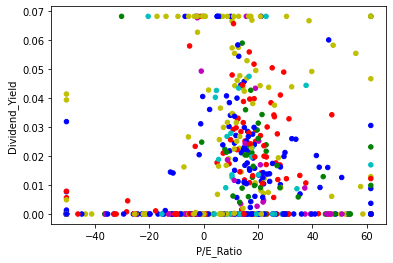

In [1116]:
df.plot.scatter(x="P/E_Ratio",y="Dividend_Yield",c=colors)
plt.show()

Those plots above are really messed up with overlapping

In [1117]:
# Remove the Group code identifier in order to implement K-means analysis
df1=df.copy()
cols = [0,9]
df1.drop(df1.columns[cols],axis=1, inplace=True)

df1.head()

,Current_Ratio,Quick_Ratio,ROA,Fixed_Assets_Turnover,Total_Assets_Turnover,Market/Book_Ratio,P/E_Ratio,Dividend_Yield
0,0.477288,0.393181,0.023308,1.029874,0.735243,-7.426815,10.474659,0.012711
1,1.548476,1.062261,-0.018139,15.195450,0.859283,1.316129,-33.002106,0.000000
2,3.503831,2.619277,0.085030,4.230343,0.442691,1.085937,11.344678,0.024483
3,1.351441,0.783801,0.011638,8.332800,2.169790,2.507364,45.577888,0.000000
4,0.607410,0.587016,0.040048,1.218699,0.757331,1.998495,17.154130,0.021077


## K-means Cluster Analysis

In [1118]:
# import KMeans
from sklearn.cluster import KMeans
# Convert DataFrame to matrix
mat = df1.values

# Using sklearn
km = KMeans(n_clusters=6)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
df1['Group']=labels
df1.head()

,Current_Ratio,Quick_Ratio,ROA,Fixed_Assets_Turnover,Total_Assets_Turnover,Market/Book_Ratio,P/E_Ratio,Dividend_Yield,Group
0,0.477288,0.393181,0.023308,1.029874,0.735243,-7.426815,10.474659,0.012711,1
1,1.548476,1.062261,-0.018139,15.195450,0.859283,1.316129,-33.002106,0.000000,2
2,3.503831,2.619277,0.085030,4.230343,0.442691,1.085937,11.344678,0.024483,1
3,1.351441,0.783801,0.011638,8.332800,2.169790,2.507364,45.577888,0.000000,4
4,0.607410,0.587016,0.040048,1.218699,0.757331,1.998495,17.154130,0.021077,1


## Graph the results of the predicted clusters

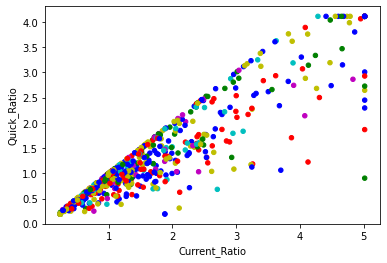

In [1119]:
colors = np.where(df1["Group"]==0,'r','-')
colors[df1["Group"]==1] = 'b'
colors[df1["Group"]==2] = 'c'
colors[df1["Group"]==3] = 'y'
colors[df1["Group"]==4] = 'g'
colors[df1["Group"]==5] = 'm'

df1.plot.scatter(x="Current_Ratio",y="Quick_Ratio",c=colors)
plt.show()

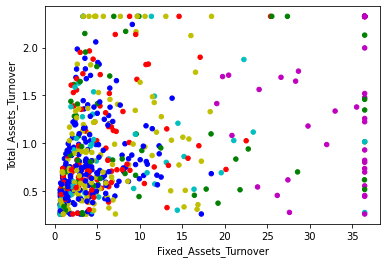

In [1120]:
df1.plot.scatter(x="Fixed_Assets_Turnover",y="Total_Assets_Turnover",c=colors)
plt.show()

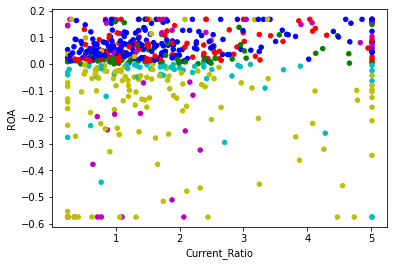

In [1121]:
df1.plot.scatter(x="Current_Ratio",y="ROA",c=colors)
plt.show()

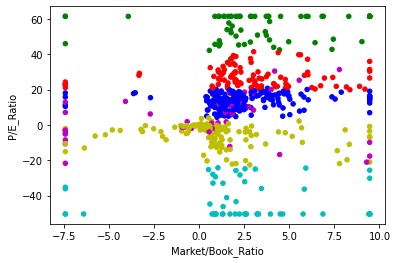

In [1122]:
df1.plot.scatter(x="Market/Book_Ratio",y="P/E_Ratio",c=colors)
plt.show()

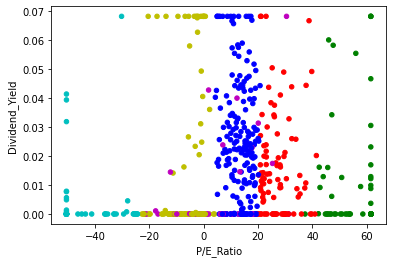

In [1123]:
df1.plot.scatter(x="P/E_Ratio",y="Dividend_Yield",c=colors)
plt.show()

Very obviously, those scatter plots above distribute more regularly with clusters.

## Data Merge

Merge the true labels (GroupSIC) with predicted labels (Group)

In [1124]:
df['Group']=df1.Group
df

,SIC,Current_Ratio,Quick_Ratio,ROA,Fixed_Assets_Turnover,Total_Assets_Turnover,Market/Book_Ratio,P/E_Ratio,Dividend_Yield,GroupSIC,Group
0,45,0.477288,0.393181,0.023308,1.029874,0.735243,-7.426815,10.474659,0.012711,2,1
1,35,1.548476,1.062261,-0.018139,15.195450,0.859283,1.316129,-33.002106,0.000000,1,2
2,35,3.503831,2.619277,0.085030,4.230343,0.442691,1.085937,11.344678,0.024483,1,1
3,45,1.351441,0.783801,0.011638,8.332800,2.169790,2.507364,45.577888,0.000000,2,4
4,45,0.607410,0.587016,0.040048,1.218699,0.757331,1.998495,17.154130,0.021077,2,1
...,...,...,...,...,...,...,...,...,...,...,...
594,45,0.993563,0.961422,-0.030590,4.722214,1.223862,1.142435,-15.352656,0.000000,2,3
595,35,3.561806,2.660926,0.109886,3.157451,0.964708,9.456508,61.516092,0.000000,1,4
596,45,0.512008,0.470533,-0.003484,0.920485,0.687045,0.432285,-20.399523,0.068285,2,3
597,35,2.442372,1.574889,-0.575411,0.980769,0.257303,1.376808,-1.384275,0.000000,1,3


## Accuracy Check

#### Comparing

Create a variable (Match) that equals 1 if predicted label (Group) equals actual label (GroupSIC), zero otherwise.

In [1125]:
df['Match'] = np.where(df['Group'] == df['GroupSIC'], 1,0)
df

,SIC,Current_Ratio,Quick_Ratio,ROA,Fixed_Assets_Turnover,Total_Assets_Turnover,Market/Book_Ratio,P/E_Ratio,Dividend_Yield,GroupSIC,Group,Match
0,45,0.477288,0.393181,0.023308,1.029874,0.735243,-7.426815,10.474659,0.012711,2,1,0
1,35,1.548476,1.062261,-0.018139,15.195450,0.859283,1.316129,-33.002106,0.000000,1,2,0
2,35,3.503831,2.619277,0.085030,4.230343,0.442691,1.085937,11.344678,0.024483,1,1,1
3,45,1.351441,0.783801,0.011638,8.332800,2.169790,2.507364,45.577888,0.000000,2,4,0
4,45,0.607410,0.587016,0.040048,1.218699,0.757331,1.998495,17.154130,0.021077,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
594,45,0.993563,0.961422,-0.030590,4.722214,1.223862,1.142435,-15.352656,0.000000,2,3,0
595,35,3.561806,2.660926,0.109886,3.157451,0.964708,9.456508,61.516092,0.000000,1,4,0
596,45,0.512008,0.470533,-0.003484,0.920485,0.687045,0.432285,-20.399523,0.068285,2,3,0
597,35,2.442372,1.574889,-0.575411,0.980769,0.257303,1.376808,-1.384275,0.000000,1,3,0


## Summary Measure

>$Prediction Accuracy Measure = \frac {Number of Correct Predictions}{Number of Predictions}$ 

In [1126]:
# The variable total adds up the total number of matches.
Total = df['Match'].sum()
# There are 599 total observations to predict in this example sample. Your sample will be larger.
print ("The prediction accuary is ", Total/599)

The prediction accuary is  0.2587646076794658
